# Assignment 9 Answer

- There are some lecture references in this document. They are notes to myself and can be ignored.

In [42]:
from scipy.integrate import odeint
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# pip install phaseportrait
import phaseportrait

## Q1

x an be computed as an ODE $\dot{x} = Ax$ with the initial condition $\vec{x_0} = \begin{bmatrix} 0 & 1 & 2\end{bmatrix}$.

We can also plot y using the values for $x(t)$ by transposing the resulting $m \times 3$ matrix into a $3 \times m$ matrix and performing the matrix multiplication $y(t) = \begin{bmatrix} 1 & 0 & 1\end{bmatrix} \vec{x}(t)$.

Given the current $A$, $\dot{x_3}$ is always zero, meaning it remains constant. This leaves $y(t)$ entirely dependent on the value of $x_1(t)$. In other words, we should observe that $y(t)$ is identical to $x_1(t)$, while being offset by a constant $x_3(0)=2$.

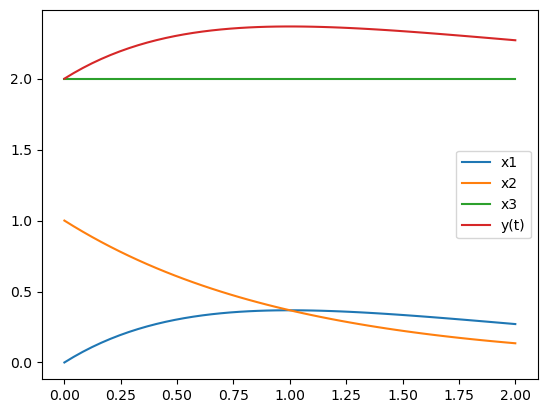

In [43]:
A = np.array(
    [
        [-1, 1, 0],
        [0, -1, 0],
        [0, 0, 0],
    ]
)

C = np.array([1, 0, 1])

def model(x, t):
    return A @ x

T = 2
t = np.linspace(0, T)

x0 = [0, 1, 2]

x = odeint(model, x0, t)
y = C @ x.T

plt.plot(t, x[:, 0], label='x1')
plt.plot(t, x[:, 1], label='x2')
plt.plot(t, x[:, 2], label='x3')
plt.plot(t, y, label='y(t)')
plt.legend()
plt.show()

Since $y(t)=Bx(t)$, the value of $y(T)$ is directly determined by the value of $x(T)$. Because of this, $y(T)$ is not necessary to compute as an ODE, and can be calculated directly based on the value of $x(T)$:

In [44]:
print(f"T     = {t[-1]}")
print(f"x1(T) = {x[-1][0]:.2f}")
print(f"x2(T) = {x[-1][1]:.2f}")
print(f"x3(T) = {x[-1][2]:.2f}")
print(f"y(T)  = {C@x[-1]:.2f}")

T     = 2.0
x1(T) = 0.27
x2(T) = 0.14
x3(T) = 2.00
y(T)  = 2.27


## Q2

The free evolution of a system is when the inputs are zero. For the system:

$\dot{\vec{x}} = A\vec{x} + B\vec{u}$

the free evolution is when $u = \vec{0}$:

$\dot{x} = Ax + B \vec{0} = Ax$

The process for computing this system is therefore the same as in Q1, except matrix $A$ and $C$ have different values.

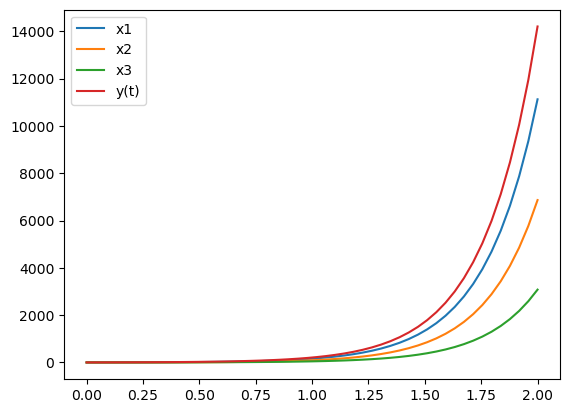

In [45]:
A = np.array(
    [
        [1, 3, 5],
        [2, 1, 0],
        [0, 1, 2],
    ]
)

C = np.array([1, 0, 1])

def model(x, t):
    return A @ x

T = 2
t = np.linspace(0, T)

x0 = [0, 1, 2]

x = odeint(model, x0, t)
y = C @ x.T

plt.plot(t, x[:, 0], label='x1')
plt.plot(t, x[:, 1], label='x2')
plt.plot(t, x[:, 2], label='x3')
plt.plot(t, y, label='y(t)')
plt.legend()
plt.show()

## Q3

- Lecture 216 Transition matrices for non diagonalizable A's
- Lecture 208 Jordan forms

For $A \in \mathbb{R}^{n \times n}$ with the characteristic polynomial $(s-5)^3(s-4)^2$ and the minimal polynomial $(s-5)^2(s-4)$:

I expect the matrix $A$ to have the shape:

$\begin{bmatrix}
5 & 1 & 0 & 0 & 0 \\
0 & 5 & 0 & 0 & 0 \\
0 & 0 & 5 & 0 & 0 \\
0 & 0 & 0 & 4 & 1 \\
0 & 0 & 0 & 0 & 4
\end{bmatrix}$

The Jordan form of $A$ is:

$\begin{bmatrix}
\begin{bmatrix} 5 & 1 \\ 0 & 5 \end{bmatrix} & 0 & 0 \\
0 & \begin{bmatrix} 5 \end{bmatrix} & 0 \\
0 & 0 & \begin{bmatrix} 4 & 1 \\ 0 & 4 \end{bmatrix} 
\end{bmatrix}$

I expect the matrix $e^{At}$ to have the shape:

$\begin{bmatrix}
e^{5t} & te^{5t} & 0 & 0 & 0 \\
0 & e^{5t} & 0 & 0 & 0 \\
0 & 0 & e^{5t} & 0 & 0 \\
0 & 0 & 0 & e^{4t} & te^{4t} \\
0 & 0 & 0 & 0 & e^{4t}
\end{bmatrix}$

This is because each isolated system has its own independent free evolution.